In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import dweibull

I used the following https://markdownguide.offshoot.io/basic-syntax/ for Markdown best practices.

#1. Project Scope
For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.
We suggest you use the numpy.random package for this purpose.
Specifically, in this project you should:
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.


The amrkdown code used was #https://www.digitalocean.com/community/tutorials/markdown-markdown-images

# Introduction to dataset
My dataset is from Smartbay https://www.smartbay.ie/about which is "Irelands key national facility for advanced marine research and the development of marine technologies, sensors and equipment expanding the Blue Economy and improving our ocean knowledge. The SmartBay test site is located off the North shore of Galway Bay, close to Spiddal. This test site has been in oeration since 2006. The dataset is located at https://data.gov.ie/dataset/smartbay-ireland-galway-bay-buoy-weather.
After reading .csv file, I can see the original dataset contains 8 variables. I decided to drop 4 variables using .drop() as some variables were duplicates with different units of measure to have a more concise dataset.https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas

![The Smart Bay test site](https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg "The Smart Bay test site")

# Examining original dataset

In [221]:
df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',)
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)','Wind Speed (Meters/Sec)','Barometric Pressure (inches)'],axis =1)
df1

,SensorTimestamp,Air Temperature (Degrees C),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Barometric Pressure (Millibars)
0,11/08/2015 14:54:33,11.7,247.8,9.9,1022.6
1,11/08/2015 14:54:42,11.9,247.8,11.1,1022.7
2,11/08/2015 14:56:59,11.9,257.1,11.7,1022.7
3,13/08/2015 10:50:11,15.1,173.7,6.5,1019.0
4,13/08/2015 12:02:42,11.4,258.1,10.1,1018.1
...,...,...,...,...,...
1606,19/02/2016 10:04:15,6.1,251.5,27.0,1005.4
1607,19/02/2016 10:09:15,6.2,240.2,23.4,1005.3
1608,19/02/2016 10:14:15,6.2,248.6,25.1,1005.2
1609,19/02/2016 10:19:15,6.3,246.7,25.7,1005.2


Below is plot of all 4 variables

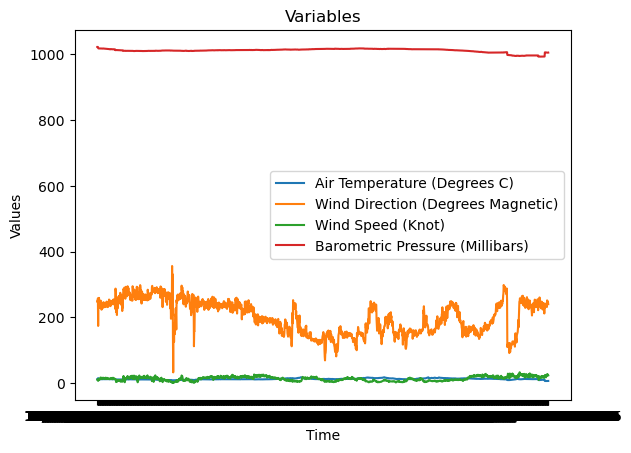

In [222]:
sns.lineplot(data=df1, x = 'SensorTimestamp', y = 'Air Temperature (Degrees C)')
sns.lineplot(data=df1, x = 'SensorTimestamp', y = 'Wind Direction (Degrees Magnetic)')
sns.lineplot(data=df1, x = 'SensorTimestamp', y = 'Wind Speed (Knot)')
sns.lineplot(data=df1, x = 'SensorTimestamp', y = 'Barometric Pressure (Millibars)')
plt.title('Variables')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend(['Air Temperature (Degrees C)','Wind Direction (Degrees Magnetic)','Wind Speed (Knot)','Barometric Pressure (Millibars)'])
plt.show()

# Variables in dataset

The following 4 variables are part of my dataset. 

1. Air Temperature (Degrees C)is measured by a thermometer. The temperature of the air can affect the weather. Warm air rises above cold air due to its density. The term temperature gradient is used to describe the temperature differnces between 2 points. A higher temperature gradient leads to a higher wind speed.https://www.windlogger.com/blogs/news/how-does-cold-weather-affect-wind-speed. My dataset is measured in degrees Celcius.

2. Wind Direction (Degrees Magnetic) relates to the direction the wind is blowing."It is based on the 360° azimuth circle with the 0/360° azimuth radialaligned  with  magnetic north." https://meteorologytraining.tpub.com/14269/css/14269_56.htm. Wind directions also give rise to distinct local wind patterns that affect specific areas. Sea and land breezes are excellent examples of such patterns. During the day, the land heats up more quickly than the adjacent water, causing air to rise over the land and draw in cooler air from the sea. Therefore, these breezes are called sea breezes. At night, the process reverses, and the land breeze blows from the cooler land towards the warmer water. These processes create land breezes.https://a-z-animals.com/blog/wind-direction-meaning-unraveling-the-significance-and-effects-of-wind-directions/. In Ireland, the wind blows from the south and west most often, while flow from the northeast or south least often. https://www.met.ie/climate/what-we-measure/wind. Wind Direction (Degrees Magnetic) is measured by a vane. 

3. Wind Speed (Knot) is typicallY measured by an anemometer and can be defined as the rate at which air moves horizontally past a point. Wind is created when air moves from areas of high pressure to areas of low pressure. Temperature gradients are higher during winter as a result, and this brings faster wind.
https://www.windlogger.com/blogs/news/how-does-cold-weather-affect-wind-speed,https://sciencing.com/winds-formed-5145233.html

4. Barometric Pressure (inches) is measured by a barometer, and is also known as atmospheric pressure, and is the force exerted by the weighT of the atmosphere on the earths surface. A unit of pressure is a pascal. Barometric Pressure is measured typically by a mercury barometer. Low atmospheric pressure typically leads to wind while high pressure typically leads to calm weather. https://education.nationalgeographic.org/resource/atmospheric-pressure/. Differences in atmospheric pressure genrate winds.


# Exploring new dataset (df2)
In the code below I add a new column called "datetime". SensorTimestamp column is int 64 bit, with type as a datetime. To filter on a paticular date, I have set the datetime column as the index column. I am filtering data on a 24 hour period  (16th Aug 2015) which has 272 datapoints. This data is the basis i will use to synthesise my new data set. I use the .dtypes and .info() commands to display information on the variables in my new dataset.

In [223]:
pd.to_datetime(df1['SensorTimestamp'])
df1['datetime'] = pd.to_datetime(df1['SensorTimestamp'])
df1.set_index('datetime', inplace=True)
df2 =df1.loc[('2015-08-16')]

In [224]:
df2.dtypes

SensorTimestamp                       object
Air Temperature (Degrees C)          float64
Wind Direction (Degrees Magnetic)    float64
Wind Speed (Knot)                    float64
Barometric Pressure (Millibars)      float64
dtype: object

In [225]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 272 entries, 2015-08-16 00:00:25 to 2015-08-16 23:56:33
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SensorTimestamp                    272 non-null    object 
 1   Air Temperature (Degrees C)        272 non-null    float64
 2   Wind Direction (Degrees Magnetic)  272 non-null    float64
 3   Wind Speed (Knot)                  272 non-null    float64
 4   Barometric Pressure (Millibars)    272 non-null    float64
dtypes: float64(4), object(1)
memory usage: 12.8+ KB


# Types of variables
Four of the variables in my dataset are non null float64 variables, also known as the double precision floating point. This datatype is part of the numpy module in python, These usually occupy 64 bits in computer memory. This type of variable can be positive, negative or 0. The IEEE 754 standard specifies a binary64 as having: Sign @ 1 bit,exponent @ 11 bit and Significand precision @ 53 bits (52 explicitly stored) https://en.wikipedia.org/wiki/Double-precision_floating-point_format. These variables are Quantitve, as they are numerical that represent quantities. These are also continious variables as they can take on any numerical value in a range. https://www.statisticshowto.com/quantitative-variables-data/.  

The remaining variable I created in steps above called "datetime" and is of type datetime64[ns]. This can be either a date unit or time unit. "the date units are years (‘Y’), months (‘M’), weeks (‘W’), and days (‘D’), while the time units are hours (‘h’), minutes (‘m’), seconds (‘s’), milliseconds (‘ms’), and some additional SI-prefix seconds-based units. The datetime64 data type also accepts the string “NAT”, in any combination of lowercase/uppercase letters, for a “Not A Time” value." https://numpy.org/doc/stable/reference/arrays.datetime.html The datetime variable is also Quantitve, and can be classified as a continious variable.

1. Air Temperature (Degrees C)                 float64              
2. Wind Direction (Degrees Magnetic)           float64
3. Wind Speed (Knot)                           float64
4. Barometric Pressure (Millibars)             float64
5. datetime                                    datetime64[ns]

In [226]:
df2.info('datetime')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 272 entries, 2015-08-16 00:00:25 to 2015-08-16 23:56:33
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SensorTimestamp                    272 non-null    object 
 1   Air Temperature (Degrees C)        272 non-null    float64
 2   Wind Direction (Degrees Magnetic)  272 non-null    float64
 3   Wind Speed (Knot)                  272 non-null    float64
 4   Barometric Pressure (Millibars)    272 non-null    float64
dtypes: float64(4), object(1)
memory usage: 12.8+ KB


# Likely Distribution

For each of my variables I will be using the following distribution to synthessie a new dataset. I had planned on using different distribution (triangular & dweibull) instead of normal for some variables, but once seed was removed, I felt a normal distribution reflected my original dataset more consistently.

1.   Air Temperature (Degrees C):           (Normal Distribution)
2.   Wind Direction (Degrees Magnetic):     (Dweibull Distribution)
3.   Wind Speed (Knot):                     (Normal Distribution)
4.   Barometric Pressure (Millibars):       (Normal Distribution)

## Plot of df2 dataset with new datetime variable

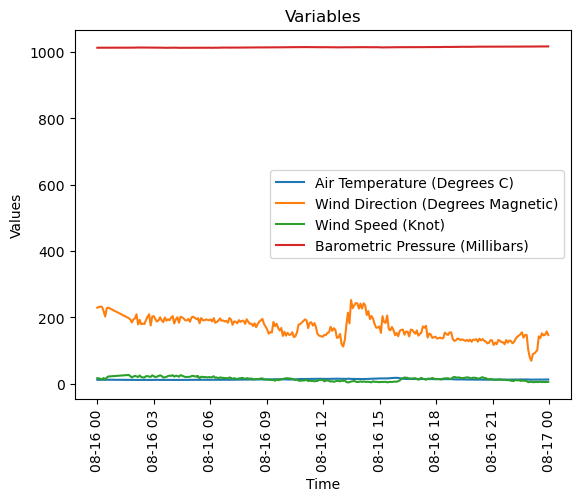

In [227]:
sns.lineplot(data=df2, x = 'datetime', y = 'Air Temperature (Degrees C)')
sns.lineplot(data=df2, x = 'datetime', y = 'Wind Direction (Degrees Magnetic)')
sns.lineplot(data=df2, x = 'datetime', y = 'Wind Speed (Knot)')
sns.lineplot(data=df2, x = 'datetime', y = 'Barometric Pressure (Millibars)')
plt.title('Variables')
plt.xlabel('Time')
plt.xticks(rotation=90)
plt.ylabel('Values')
plt.legend(['Air Temperature (Degrees C)','Wind Direction (Degrees Magnetic)','Wind Speed (Knot)','Barometric Pressure (Millibars)'])
plt.show()

I used .describe() to display count, mean, standard deviation, min, 25%, 50%, 75% and max values. These values especially the mean and standard deviation will be used as inputs into distribution model later.

df2.describe()

# Relationship between variables

 After reasearching the variables in my dataset, the following relationships should be present.  

 Air Temperature (Degrees C), Wind Speed (Knot),Barometric Pressure (Millibars) can be classed as linear variables, while Wind Direction (Degrees AfterMagnetic) is a circular variable as data can range from 0 to 360 deg and start again at 0 degrees. Wind direction (circular) is often associated with Air temp (Linear). https://link.springer.com/article/10.1007/s00703-017-0508-y .1

 - I am expecting a negative correlation between Wind Speed (Knot) and Barometric Pressure (Millibars) https://www.education.com/science-fair/article/windy-weather-ii-correlation-between-barometric/ .   
    as Warm temperatures causes Barometric pressure to rise while cold air causes Barometric pressure to fall. I discovered the the Coriolis effect which describes how the wind deflects from its straight path between high and low pressure areas https://www.thoughtco.com/winds-and-the-pressure-gradient-force-1434440. The wind path would be opposite so if the data was collected in southern hemisphere, then relationship would be positive. https://education.nationalgeographic.org/resource/coriolis-effect/. 

- I am expecting a negative correlation between Wind Direction (Degrees Magnetic) and Barometric Pressure (Millibars) for the same reason as relationship between Wind Speed (Knot) and Barometric Pressure (Millibars) 

 - I am expecting a negative correlation between Air Temperature (Degrees C) &Wind Speed (Knot), as temperature differences between air masses cause pressure differences which results in wind.https://www.windlogger.com/blogs/news/how-does-cold-weather-affect-wind-speed. A higher temperature gradient leads to a higher wind speed.https://www.windlogger.com/blogs/news/how-does-cold-weather-affect-wind-speed. -.6

 - I did not find any literature to indicate any relationship between Air Temperature (Degrees C) & Wind Direction (Degrees Magnetic) 

 ![The Coreolis](https://sageography.co.za/wp-content/uploads/sites/2/2012/11/3coriolis.gif "The Coreolis")
   
 I will examine correlation of my datset and compare to my research

# Correlation Analysis of original dataset

Correlation coefficient: between Air Temperature (Degrees C) & Wind Speed (Knot) is  [[ 1.         -0.68345298]
 [-0.68345298  1.        ]]


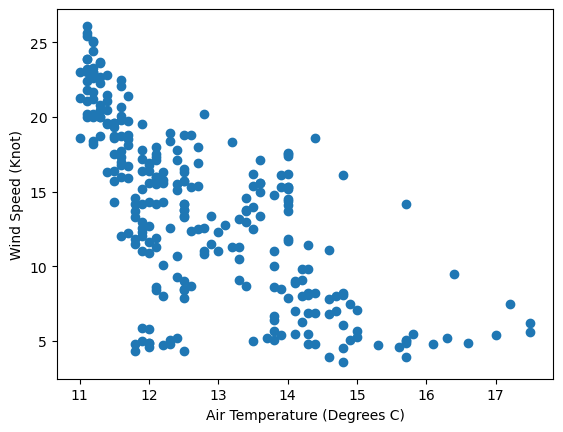

In [228]:
x =df2['Air Temperature (Degrees C)']
y =df2['Wind Speed (Knot)']
r = np.corrcoef(x, y)
print('Correlation coefficient: between Air Temperature (Degrees C) & Wind Speed (Knot) is ', r)
plt.scatter(x, y)
plt.xlabel('Air Temperature (Degrees C)')
plt.ylabel('Wind Speed (Knot)')
plt.show()

Correlation coefficient: between Air Temperature (Degrees C) & Wind Direction (Degrees Magnetic) is  [[ 1.         -0.11180902]
 [-0.11180902  1.        ]]


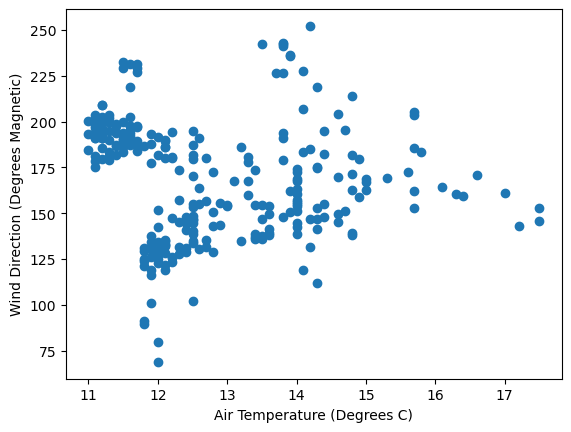

In [229]:
x =df2['Air Temperature (Degrees C)']
y =df2['Wind Direction (Degrees Magnetic)']
r = np.corrcoef(x, y)
print('Correlation coefficient: between Air Temperature (Degrees C) & Wind Direction (Degrees Magnetic) is ', r)
plt.scatter(x,y)
plt.xlabel('Air Temperature (Degrees C)')
plt.ylabel('Wind Direction (Degrees Magnetic)')
plt.show()

Correlation coefficient: between Air Temperature (Degrees C) & Barometric Pressure (Millibars) is  [[1.        0.2188932]
 [0.2188932 1.       ]]


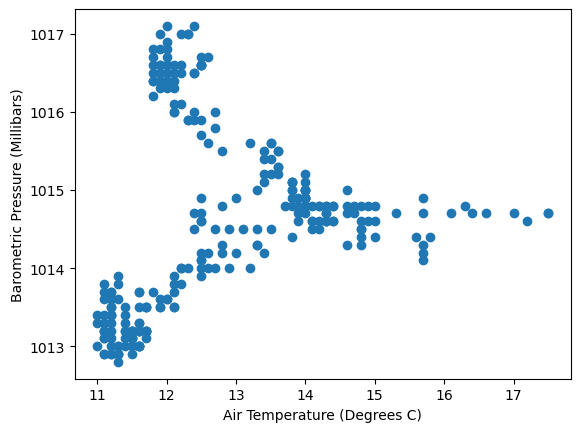

In [230]:
x =df2['Air Temperature (Degrees C)']
y =df2['Barometric Pressure (Millibars)']
r = np.corrcoef(x, y)
print('Correlation coefficient: between Air Temperature (Degrees C) & Barometric Pressure (Millibars) is ', r)
plt.scatter(x,y)
plt.xlabel('Air Temperature (Degrees C)')
plt.ylabel('Barometric Pressure (Millibars)')
plt.show()

Correlation coefficient: between Wind Direction (Degrees Magnetic) & Wind Speed (Knot) is  [[1.         0.22993643]
 [0.22993643 1.        ]]


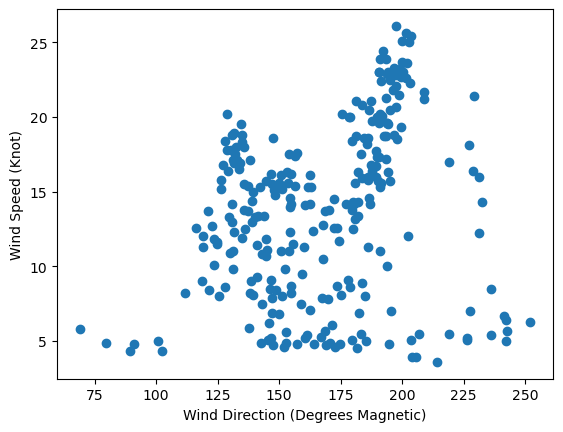

In [231]:
x =df2['Wind Direction (Degrees Magnetic)']
y =df2['Wind Speed (Knot)']
r = np.corrcoef(x, y)
print('Correlation coefficient: between Wind Direction (Degrees Magnetic) & Wind Speed (Knot) is ', r)
plt.scatter(x,y)
plt.xlabel('Wind Direction (Degrees Magnetic)')
plt.ylabel('Wind Speed (Knot)')
plt.show()

Correlation coefficient: between Wind Direction (Degrees Magnetic) & Barometric Pressure (Millibars) is  -0.7453251909394746


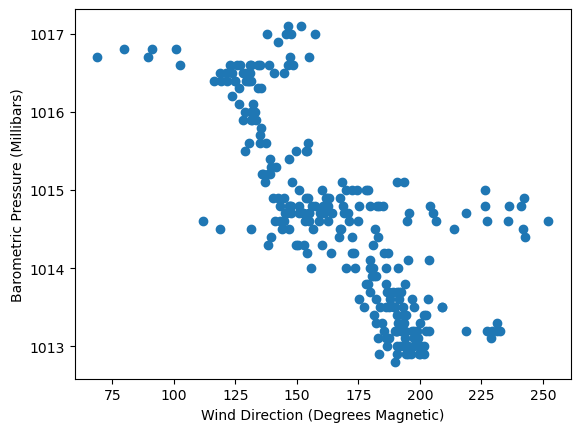

In [232]:
x =df2['Wind Direction (Degrees Magnetic)']
y =df2['Barometric Pressure (Millibars)']
r = np.corrcoef(x, y)[0,1]
print('Correlation coefficient: between Wind Direction (Degrees Magnetic) & Barometric Pressure (Millibars) is ', r)
plt.scatter(x,y)
plt.xlabel('Wind Direction (Degrees Magnetic)')
plt.ylabel('Barometric Pressure (Millibars)')
plt.show()

Correlation coefficient: between Wind Speed (Knot) & Barometric Pressure (Millibars) is  [[ 1.         -0.52556303]
 [-0.52556303  1.        ]]


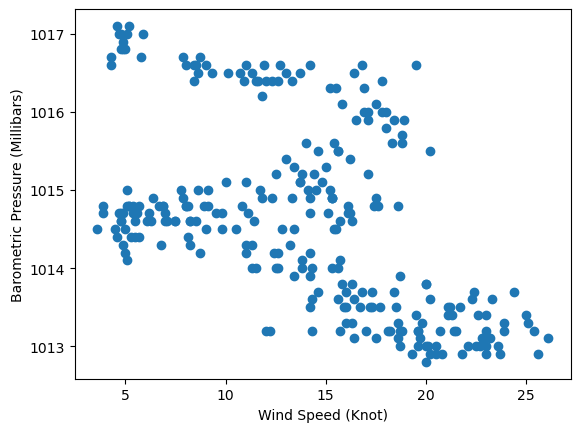

In [233]:
x =df2['Wind Speed (Knot)']
y =df2['Barometric Pressure (Millibars)']
r = np.corrcoef(x, y)
print('Correlation coefficient: between Wind Speed (Knot) & Barometric Pressure (Millibars) is ', r)
plt.scatter(x,y)
plt.xlabel('Wind Speed (Knot)')
plt.ylabel('Barometric Pressure (Millibars)')
plt.show()

# Relationship summary of original dataset

A correlation of -1 indicates a perfect negative correlation, 0 indicates no correlation and +1 indicates perfect positive correlation.  
From my reserarch of the variables in my dataset, I was able to determine which variables  *should* have a strong relationship and which variables *should* be independent variables. 

The relationship between variables Wind Direction (Degrees Magnetic) and  Air Temperature (Degrees C) is **-0.11**. I would have expected this relationship to be closer to -1. I am assuming that if data was analysied over a longer period of time, then this relationship would be stronger.  

The relationship between Wind Speed (Knot) and Barometric Pressure (Millibars) is strongly negative at **-0.52**. This is what i expected based on my research.  

The relationship between Wind Direction (Degrees Magnetic) and Barometric Pressure (Millibars) also has a strong negative relationship at **-0.74**. Again, this is roughly the outcome I expected based on  my research.  

The relationship between Air Temperature (Degrees C) &Wind Speed (Knot) is stronly negative @ **-0.68**. Based on my research, this is what I expected to see.

The relationship between Air Temperature (Degrees C) & Wind Direction (Degrees Magnetic) is independent at  **-0.11**. Based on my research, this is the outcome I expected.


I dont have a categorical variable in my dataset to model so it impossible to distinguish between variables in below pairplot. I can see however, that there is no clear correlation between the variables. I will examine this later

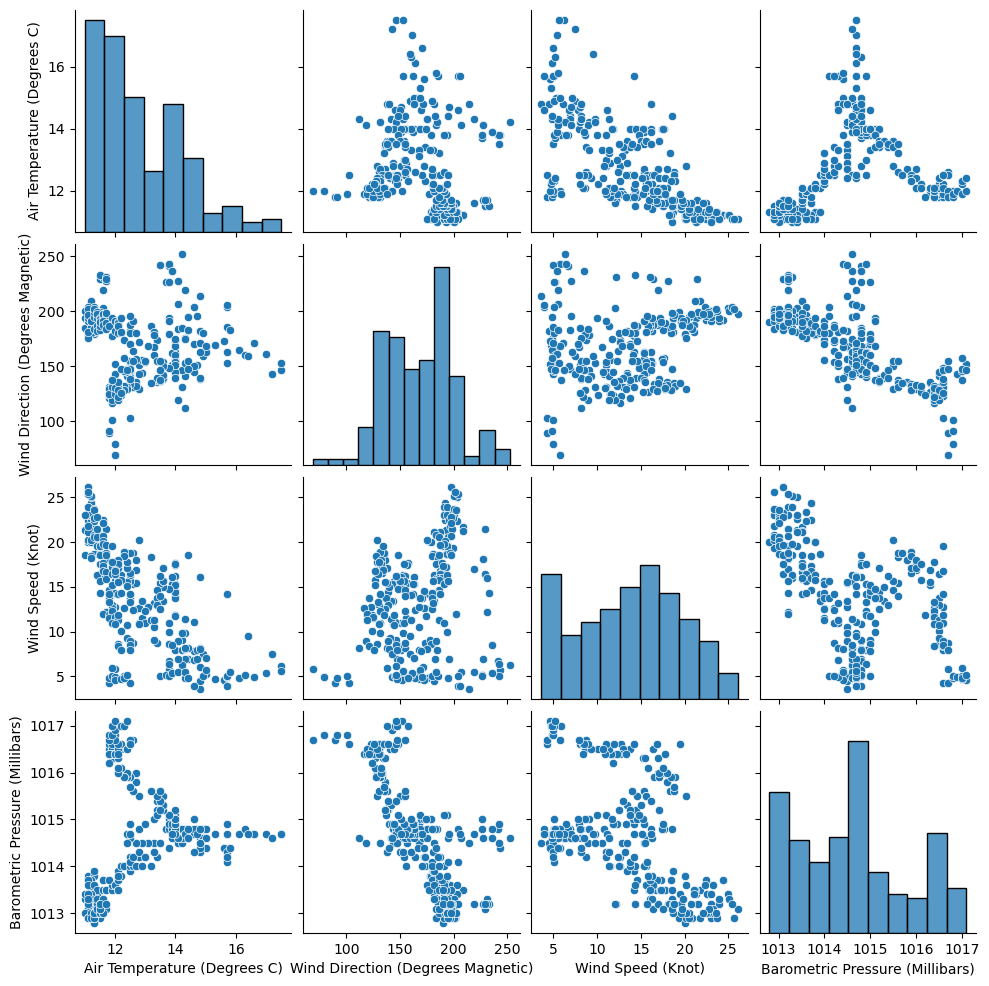

In [234]:
sns.pairplot(df2)
plt.show()

# Synthesisng new  Data Set

I have set-up a data range which will be used when synthseising data. There will be 272 datapoints created, and the frequency is minutes to replicate my origianl dataset

In [235]:
idx1 = pd.date_range(start = "2023-11-08 00:00:01", periods=272, freq="MIN",)
#idx1

## Air Temperature (Degrees C)


To model Synthesised Air Temperature (Degrees C) I will use normal (Gaussian) distribution. This distribution is often called the bell curve due to its shape. The normal distribution is a continious probabilty distribution which is symmetric around the mean. The parameters are loc: (mean), scale: (standard deviation) and size: (number to create) https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html. The mean and standard deviation are displayed above using .decribe()

In [236]:
mu = 12.801
sigma = 1.415
rng=np.random.default_rng()
ts01 = pd.DataFrame(data=rng.normal(mu, sigma,len(idx1)),index =idx1, columns=['Synthesised Air Temperature (Degrees C)'])

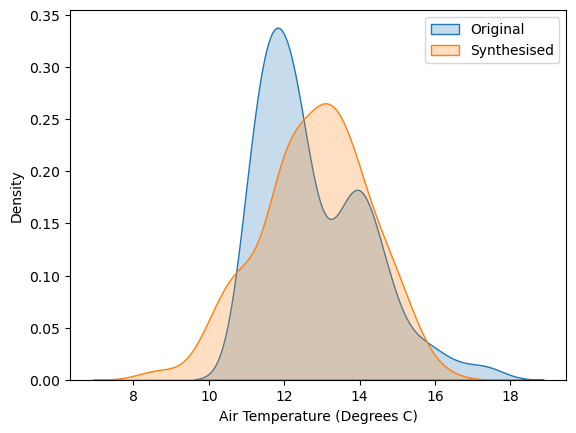

In [237]:
sns.kdeplot(df2['Air Temperature (Degrees C)'],shade=True, label="Original")
sns.kdeplot(ts01['Synthesised Air Temperature (Degrees C)'],shade=True, label="Synthesised")
plt.legend()

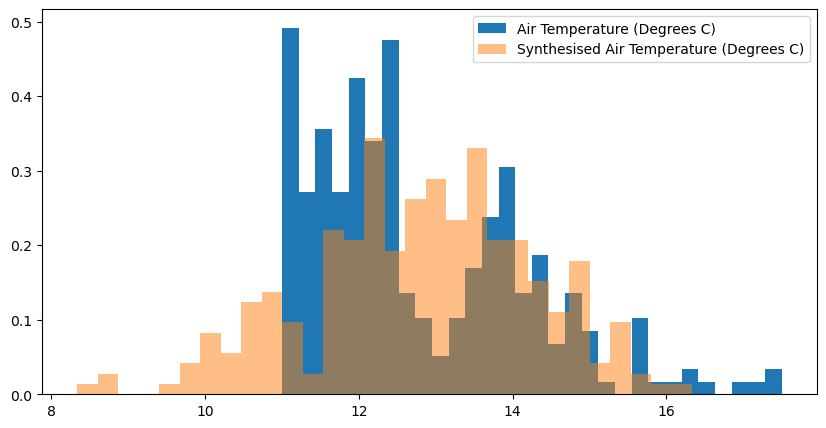

In [238]:

plt.figure(figsize=(10, 5))
count, bins, ignored = plt.hist(df2['Air Temperature (Degrees C)'], 30, density=True)
count, bins, ignored = plt.hist(ts01['Synthesised Air Temperature (Degrees C)'], 30, density=True, alpha=.5)
plt.legend(['Air Temperature (Degrees C)','Synthesised Air Temperature (Degrees C)'])
plt.show()

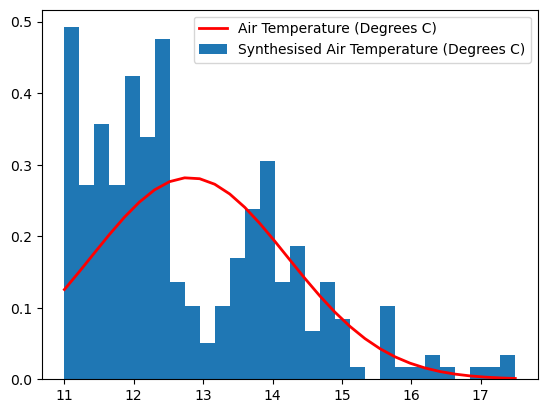

In [239]:
mu = 12.801
sigma = 1.415

count, bins, ignored = plt.hist(df2['Air Temperature (Degrees C)'], 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.legend(['Air Temperature (Degrees C)','Synthesised Air Temperature (Degrees C)'])
plt.show()

## Synthesised Wind Direction (Degrees Magnetic)

For variable Synthesised Wind Direction (Degrees Magnetic) I will use Dweibull distribution.  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull.

The weibull distribuution is a continious probaility distribuion used to model a wide range of random variables http://www.thphys.nuim.ie/Notes/EE304/Notes/LEC10/ExpWeibull_handout.pdf. When synthessing Air Temperature (Degrees C), I am using Dweibull https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull, which is a double Weibull continious random variable, typically used to model the failure rate of a system over time.  

mean and std dev info from .describe above.

I assigned the shape value = mean and scale = std dev as I found by doing this it matches original data set more closely.

In [240]:
mean = 168.141
std_dev = 32.276
shape = mean
scale = std_dev

np.random.seed()
ts02 = pd.DataFrame(data = dweibull.rvs(2,shape, scale,len(idx1)),index =idx1, columns=['Synthesised Wind Direction (Degrees Magnetic)'])

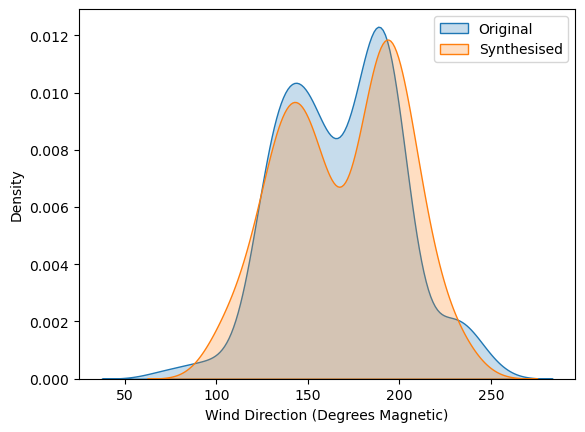

In [241]:
sns.kdeplot(df2['Wind Direction (Degrees Magnetic)'],shade=True,label = 'Original')
sns.kdeplot((ts02['Synthesised Wind Direction (Degrees Magnetic)']),shade=True,label = 'Synthesised')
plt.legend()

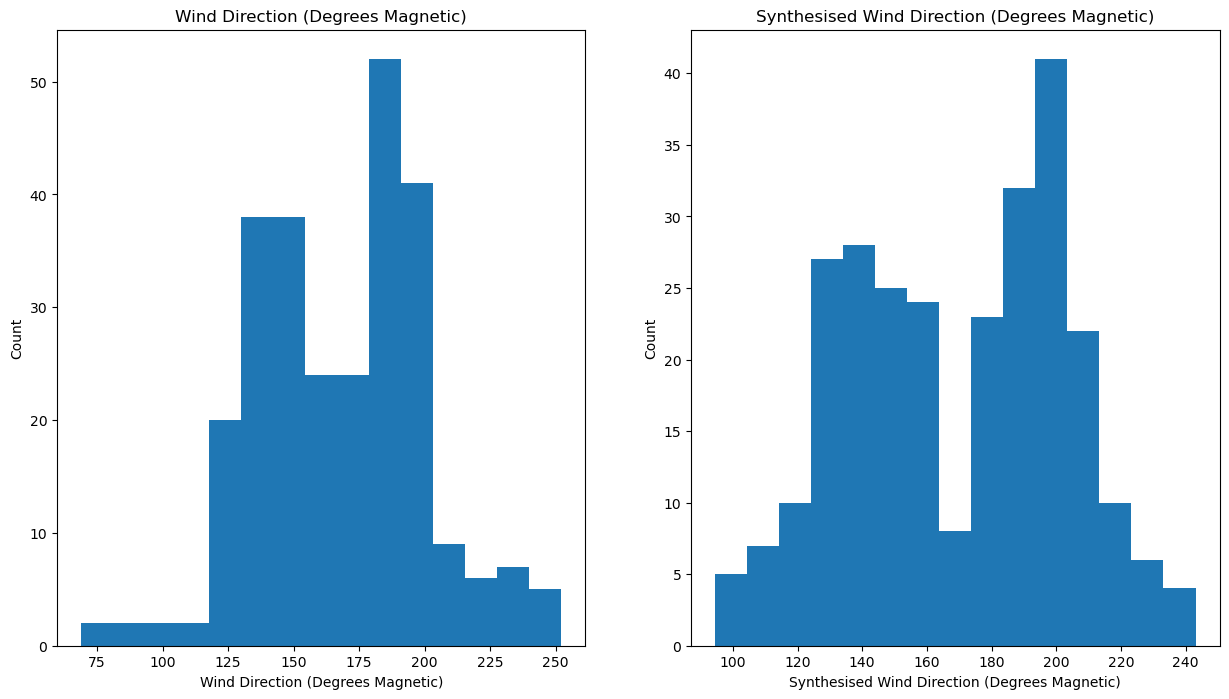

In [242]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(df2["Wind Direction (Degrees Magnetic)"], bins =15)
plt.xlabel("Wind Direction (Degrees Magnetic)")
plt.ylabel("Count")
plt.title("Wind Direction (Degrees Magnetic)")

plt.subplot(1,2,2)
plt.hist(ts02["Synthesised Wind Direction (Degrees Magnetic)"], bins =15)
plt.xlabel("Synthesised Wind Direction (Degrees Magnetic)")
plt.ylabel("Count")
plt.title("Synthesised Wind Direction (Degrees Magnetic)")
plt.show()

## Synthesised Wind Speed (Knot)

To model Synthesised Wind Speed (Knot) I will use normal (Gaussian) distribution. This distribution is often called the bell curve due to its shape. The normal distribution is a continious probabilty distribution which is symmetric around the mean. The parameters are loc: (mean), scale: (standard deviation) and size: (number to create) https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html. I am modifying data using abs() method, to return the positive value as there are not any negative values in my original dataset.The min,mean and standard deviation values are displayed above using .decribe()

In [243]:
mu  = 13.728676
sigma = 5.782885
rng=np.random.default_rng()
ts03a = pd.DataFrame(data=rng.normal(mu, sigma,len(idx1)),index =idx1, columns=['Synthesised Wind Speed (Knot)'])
ts03 = ts03a.abs()

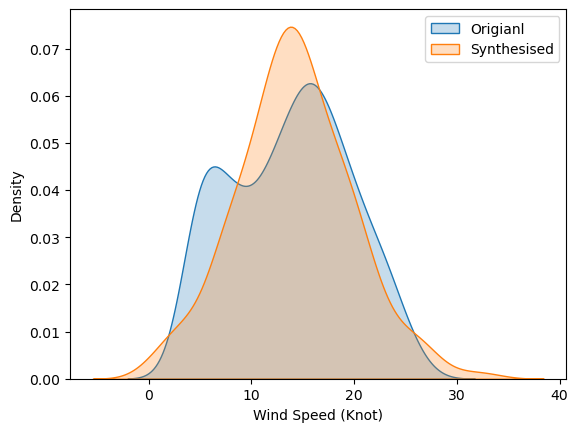

In [244]:
sns.kdeplot(df2['Wind Speed (Knot)'],shade=True,label ='Origianl')
sns.kdeplot((ts03['Synthesised Wind Speed (Knot)']),shade=True,label = 'Synthesised')
plt.legend()

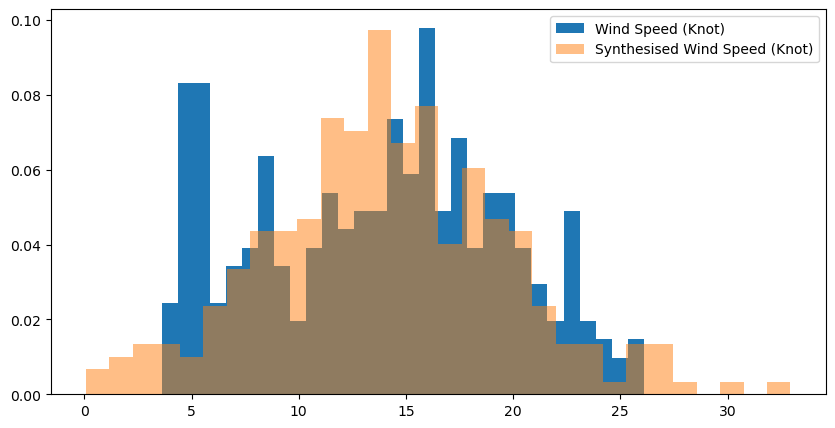

In [245]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
count, bins, ignored = plt.hist(df2['Wind Speed (Knot)'], 30, density=True)
count, bins, ignored = plt.hist(ts03['Synthesised Wind Speed (Knot)'], 30, density=True,alpha=.5)
plt.legend(['Wind Speed (Knot)','Synthesised Wind Speed (Knot)'])
plt.show()

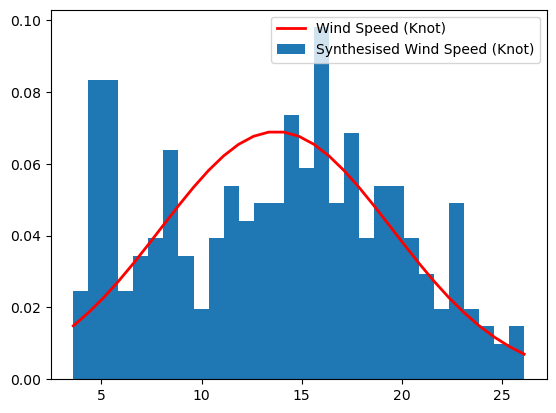

In [246]:
count, bins, ignored = plt.hist(df2['Wind Speed (Knot)'], 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.legend(['Wind Speed (Knot)','Synthesised Wind Speed (Knot)'])
plt.show()

## Synthesised Barometric Barometric Pressure (Millibars)
The next variable I synthesised is called "Synthesised Barometric Barometric Pressure (Millibars)". To model this, I will use normal (Gaussian) distribution. This distribution is often called the bell curve due to its shape. The normal distribution is a continious probabilty distribution which is symmetric around the mean. The parameters are loc: (mean), scale: (standard deviation) and size: (number to create) https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal. I had planned on using triangular distribution to model this variable, but once seed was removed I found normal distribution matched my original data set most consistently. I have added code example for triangular distribution & Dweibull distribution below in "Alternative distributions tested" section

In [247]:
mu = 1014.639706
sigma = 1.183171
rng=np.random.default_rng()
ts04 = pd.DataFrame(data=rng.normal(mu, sigma,len(idx1)),index =idx1, columns=['Synthesised Barometric Pressure (Millibars)'])

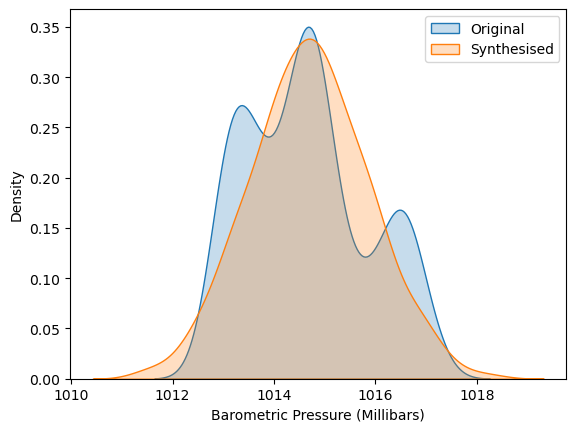

In [248]:
sns.kdeplot(df2['Barometric Pressure (Millibars)'],shade=True,label = 'Original')
sns.kdeplot(ts04['Synthesised Barometric Pressure (Millibars)'],shade=True,label ='Synthesised')
plt.legend()

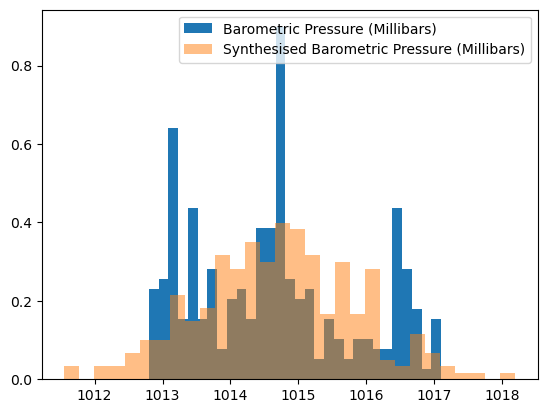

In [249]:
count, bins, ignored = plt.hist(df2['Barometric Pressure (Millibars)'], 30, density=True)
count, bins, ignored = plt.hist(ts04['Synthesised Barometric Pressure (Millibars)'], 30, density=True,alpha=.5)
plt.legend(['Barometric Pressure (Millibars)','Synthesised Barometric Pressure (Millibars)'])
plt.show()

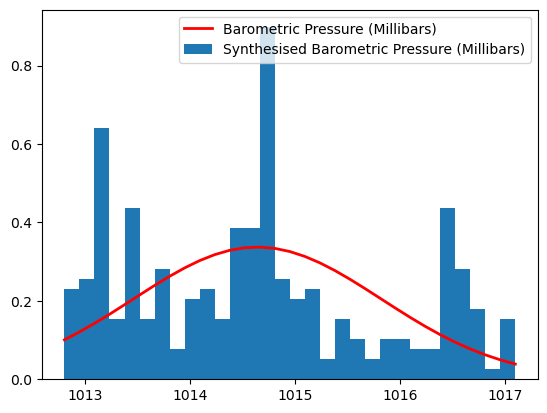

In [250]:
count, bins, ignored = plt.hist(df2['Barometric Pressure (Millibars)'], 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.legend(['Barometric Pressure (Millibars)','Synthesised Barometric Pressure (Millibars)'])
plt.show()

New Synthesised Dataset(result)

In [251]:
result=pd.concat([ts01,ts02,ts03,ts04],axis =1)
result


,Synthesised Air Temperature (Degrees C),Synthesised Wind Direction (Degrees Magnetic),Synthesised Wind Speed (Knot),Synthesised Barometric Pressure (Millibars)
2023-11-08 00:00:01,11.800240,158.594585,11.634001,1013.513425
2023-11-08 00:01:01,13.825239,195.204872,16.546454,1016.554879
2023-11-08 00:02:01,14.029329,192.438925,10.073794,1014.000969
2023-11-08 00:03:01,10.877561,197.936630,14.058478,1013.391013
2023-11-08 00:04:01,12.701023,116.040614,14.697771,1014.080451
...,...,...,...,...
2023-11-08 04:27:01,14.355595,190.157288,11.330874,1015.188227
2023-11-08 04:28:01,13.012222,231.496945,1.781947,1016.153848
2023-11-08 04:29:01,14.779510,113.910393,20.744639,1015.359569
2023-11-08 04:30:01,12.277555,182.925225,9.498277,1015.014387


In [252]:
result.describe()

,Synthesised Air Temperature (Degrees C),Synthesised Wind Direction (Degrees Magnetic),Synthesised Wind Speed (Knot),Synthesised Barometric Pressure (Millibars)
count,272.000000,272.000000,272.000000,272.000000
mean,12.810787,169.324092,14.163780,1014.697674
std,1.443622,33.158531,5.635171,1.152858
min,8.333248,94.530232,0.074556,1011.555057
25%,11.890897,141.290653,10.807916,1013.950360
50%,12.883201,176.546276,14.066057,1014.695216
75%,13.809004,196.237677,17.884084,1015.477559
max,16.339186,243.057329,32.938214,1018.192497


# Correlation Analysis of Synthesised dataset

1

Correlation coefficient: between Synthesised Air Temperature (Degrees C) & Synthesised Wind Speed (Knot) is  [[1.         0.03459691]
 [0.03459691 1.        ]]


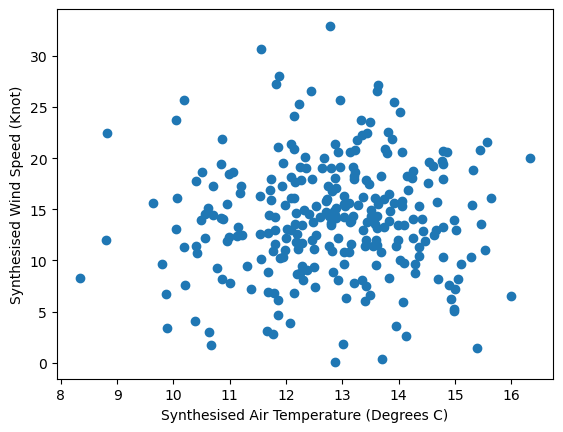

In [253]:
x =result['Synthesised Air Temperature (Degrees C)']
y =result['Synthesised Wind Speed (Knot)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Synthesised Air Temperature (Degrees C) & Synthesised Wind Speed (Knot) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Air Temperature (Degrees C)')
plt.ylabel('Synthesised Wind Speed (Knot)')
plt.show()

2

Correlation coefficient: between Synthesised Air Temperature (Degrees C) & Synthesised Wind Direction (Degrees Magnetic) is  [[1.         0.01381037]
 [0.01381037 1.        ]]


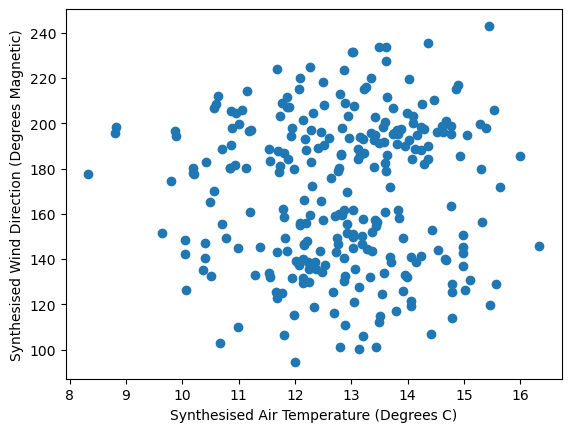

In [254]:
x =result['Synthesised Air Temperature (Degrees C)']
y =result['Synthesised Wind Direction (Degrees Magnetic)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Synthesised Air Temperature (Degrees C) & Synthesised Wind Direction (Degrees Magnetic) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Air Temperature (Degrees C)')
plt.ylabel('Synthesised Wind Direction (Degrees Magnetic)')
plt.show()

3

Correlation coefficient: between Synthesised Air Temperature (Degrees C) & Synthesised Barometric Pressure (Millibars) is  [[1.         0.08685623]
 [0.08685623 1.        ]]


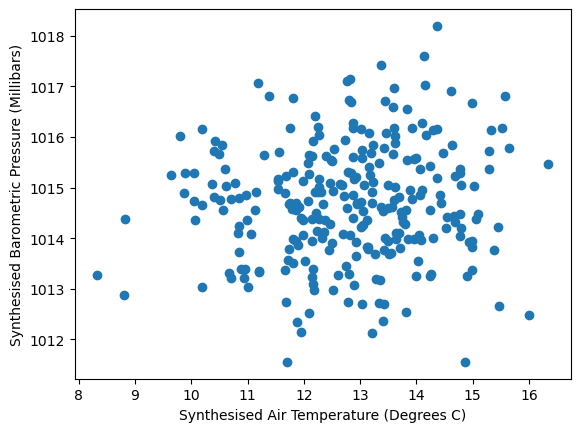

In [255]:
x =result['Synthesised Air Temperature (Degrees C)']
y =result['Synthesised Barometric Pressure (Millibars)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Synthesised Air Temperature (Degrees C) & Synthesised Barometric Pressure (Millibars) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Air Temperature (Degrees C)')
plt.ylabel('Synthesised Barometric Pressure (Millibars)')
plt.show()

4

Correlation coefficient: between Synthesised Wind Direction (Degrees Magnetic) & Synthesised Wind Speed (Knot) is  [[ 1.         -0.05201519]
 [-0.05201519  1.        ]]


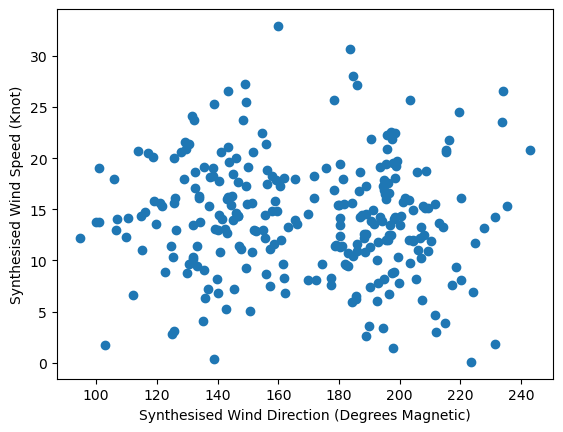

In [256]:
x =result['Synthesised Wind Direction (Degrees Magnetic)']
y =result['Synthesised Wind Speed (Knot)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Synthesised Wind Direction (Degrees Magnetic) & Synthesised Wind Speed (Knot) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Wind Direction (Degrees Magnetic)')
plt.ylabel('Synthesised Wind Speed (Knot)')
plt.show()

5

Correlation coefficient: between Synthesised Wind Direction (Degrees Magnetic) & Synthesised Barometric Barometric Pressure (Millibars) is  [[ 1.         -0.00125947]
 [-0.00125947  1.        ]]


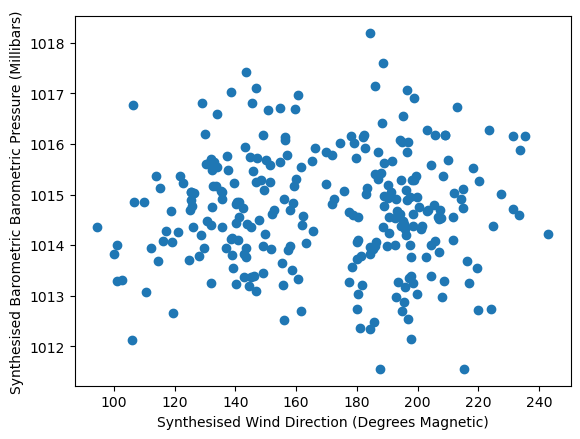

In [257]:
x =result['Synthesised Wind Direction (Degrees Magnetic)']
y =result['Synthesised Barometric Pressure (Millibars)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Synthesised Wind Direction (Degrees Magnetic) & Synthesised Barometric Barometric Pressure (Millibars) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Wind Direction (Degrees Magnetic)')
plt.ylabel('Synthesised Barometric Barometric Pressure (Millibars)')
plt.show()

6

Correlation coefficient: between Wind Speed (Knot) & Synthesised Barometric Pressure (Millibars) is  [[ 1.       -0.055428]
 [-0.055428  1.      ]]


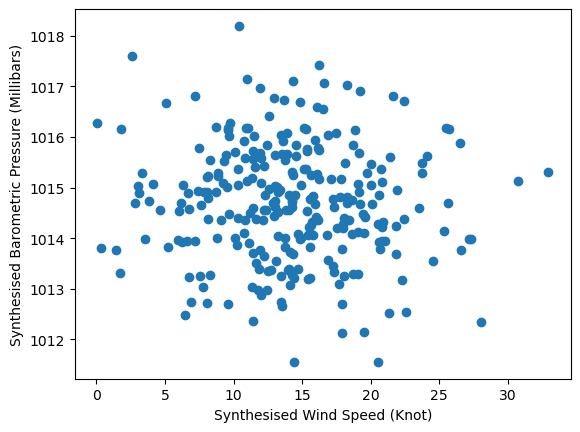

In [258]:
x =result['Synthesised Wind Speed (Knot)']
y =result['Synthesised Barometric Pressure (Millibars)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Wind Speed (Knot) & Synthesised Barometric Pressure (Millibars) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Wind Speed (Knot)')
plt.ylabel('Synthesised Barometric Pressure (Millibars)')
plt.show()

7

Correlation coefficient: between Synthesised Wind Speed (Knot) & Synthesised Barometric Pressure (Millibars) is  [[ 1.       -0.055428]
 [-0.055428  1.      ]]


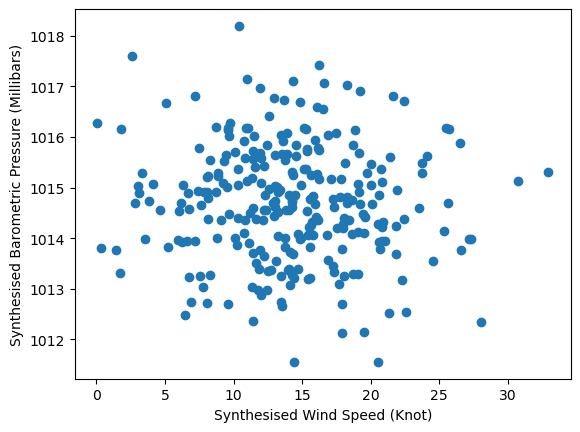

In [259]:
x =result['Synthesised Wind Speed (Knot)']
y =result['Synthesised Barometric Pressure (Millibars)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Synthesised Wind Speed (Knot) & Synthesised Barometric Pressure (Millibars) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Wind Speed (Knot)')
plt.ylabel('Synthesised Barometric Pressure (Millibars)')
plt.show()

4

# Relationship summary Synthesised data

A correlation of -1 indicates a perfect negative correlation, 0 indicates no correlation and +1 indicates perfect positive correlation. 

From my reserarch of the variables in my dataset, I was able to determine which variables  *should* have a strong relationship and which variables *should* be independent variables. 

There is no correlation between the sythesised variables. This is an expected outcome when normal distribution is used to synthesise data. Normal distribution is centred around the mean, and extreme values in both tails of the distribution is unlikely. This results in weaker relationships between variables.https://statisticsbyjim.com/basics/normal-distribution/.

In [260]:
df2.describe()

,Air Temperature (Degrees C),Wind Direction (Degrees Magnetic),Wind Speed (Knot),Barometric Pressure (Millibars)
count,272.000000,272.000000,272.000000,272.000000
mean,12.801838,168.141912,13.728676,1014.639706
std,1.415816,32.276567,5.782885,1.183171
min,11.000000,68.900000,3.600000,1012.800000
25%,11.700000,142.875000,8.575000,1013.600000
50%,12.400000,170.050000,14.200000,1014.600000
75%,13.900000,191.100000,18.025000,1015.325000
max,17.500000,252.200000,26.100000,1017.100000


In [261]:
result.describe()

,Synthesised Air Temperature (Degrees C),Synthesised Wind Direction (Degrees Magnetic),Synthesised Wind Speed (Knot),Synthesised Barometric Pressure (Millibars)
count,272.000000,272.000000,272.000000,272.000000
mean,12.810787,169.324092,14.163780,1014.697674
std,1.443622,33.158531,5.635171,1.152858
min,8.333248,94.530232,0.074556,1011.555057
25%,11.890897,141.290653,10.807916,1013.950360
50%,12.883201,176.546276,14.066057,1014.695216
75%,13.809004,196.237677,17.884084,1015.477559
max,16.339186,243.057329,32.938214,1018.192497


By using .describe() on both my original and synthesised dataset i will now look at the values of the variables.

The mean value and standard deviation value in the original and synthesied datasets are aligned for all 4 of the variables. This is to be expected as normal distribution was used to synthesise 3 out of 4 variables and mean and standrad deviation are inputs for normal distribution. 
The min values while not totally aligned with original dataset are comparable, except in the case of Synthesised Wind Direction (Degrees Magnetic) where origan min value is 68.9 and synthesised min value is 97.7.  
The 25%,50% and 75% quartile values are also comparable for both datasets.  

The max values for both datasets are comparable.

# Discussion

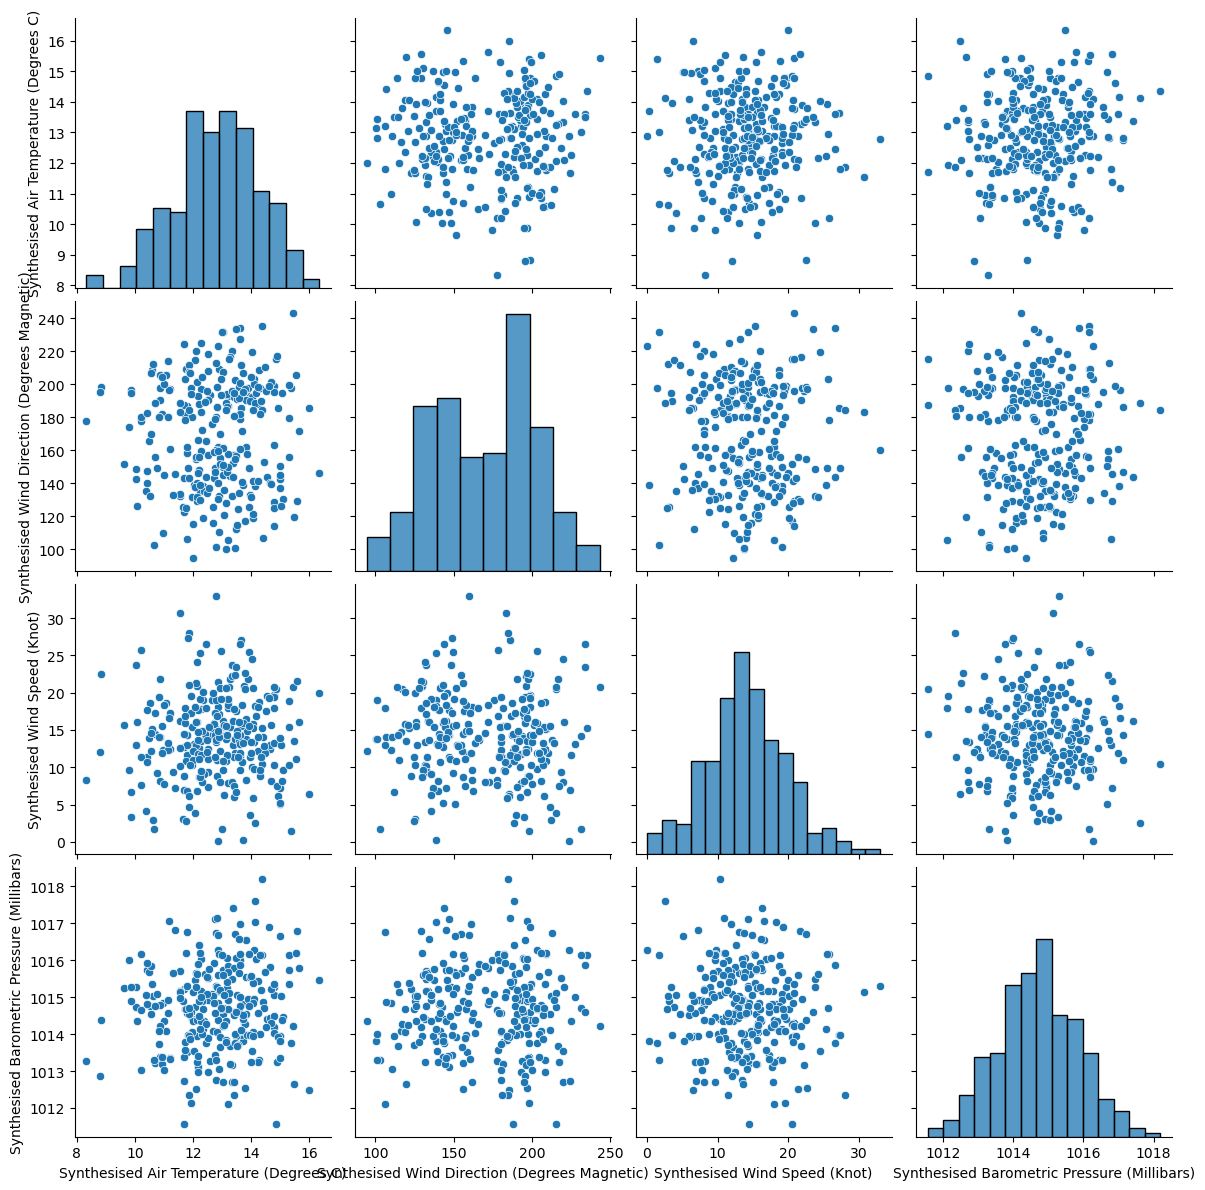

In [262]:
sns.pairplot(result, height=3, aspect=1)


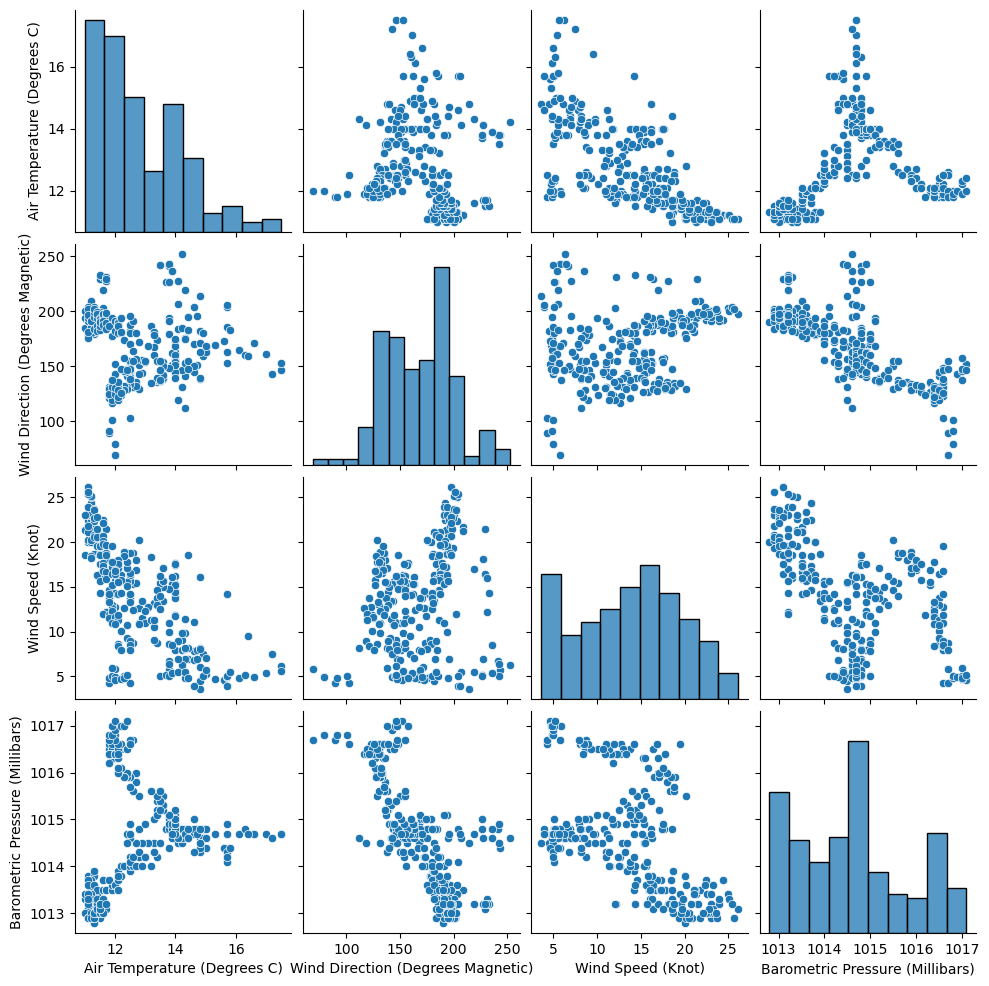

In [263]:
sns.pairplot(df2, aspect=1)

# Alternative distributions tested

The first variable I synthesise is called "Synthesised Air Temperature (Degrees C)". To model this, i will use Dweibull distribution.  https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull.

The weibull distribuution is a continious probaility distribuion used to model a wide range of random variables http://www.thphys.nuim.ie/Notes/EE304/Notes/LEC10/ExpWeibull_handout.pdf. When synthessing Air Temperature (Degrees C), I am using Dweibull https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull, which is a double Weibull continious random variable, typically used to model the failure rate of a system over time. 

I assigned the shape value = mean and scale = std dev as I found by doing this it matches original data set more closely.

In [273]:
mean = 12.801
std_dev = 1.415
shape = mean
scale = std_dev

np.random.seed(70)
ts001 = pd.DataFrame(data = dweibull.rvs(2,shape, scale,len(idx1)),index =idx1, columns=['Synthesised Air Temperature (Degrees C)'])

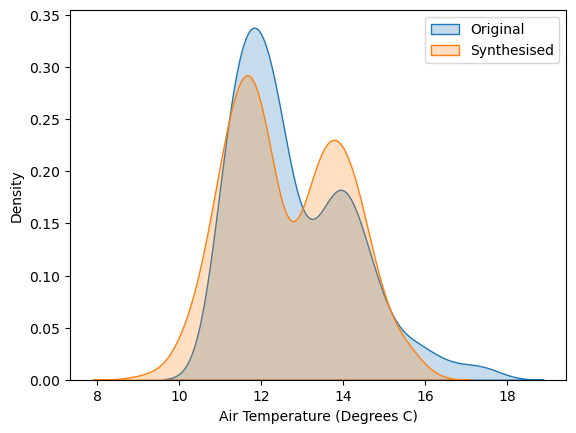

In [274]:
sns.kdeplot(df2['Air Temperature (Degrees C)'],shade=True,label='Original')
sns.kdeplot(ts001['Synthesised Air Temperature (Degrees C)'],shade=True,label='Synthesised')
plt.legend()
plt.show()

Correlation coefficient: between Synthesised Wind Direction (Degrees Magnetic) & Synthesised Wind Speed (Knot) is  [[1.         0.07211025]
 [0.07211025 1.        ]]


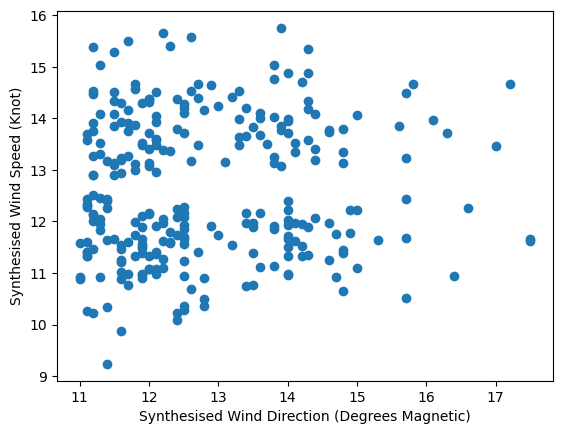

In [275]:
x =df2['Air Temperature (Degrees C)']
y =ts001['Synthesised Air Temperature (Degrees C)']
r = np.corrcoef(x, y)
print("Correlation coefficient: between Synthesised Wind Direction (Degrees Magnetic) & Synthesised Wind Speed (Knot) is ", r)
plt.scatter(x, y)
plt.xlabel('Synthesised Wind Direction (Degrees Magnetic)')
plt.ylabel('Synthesised Wind Speed (Knot)')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


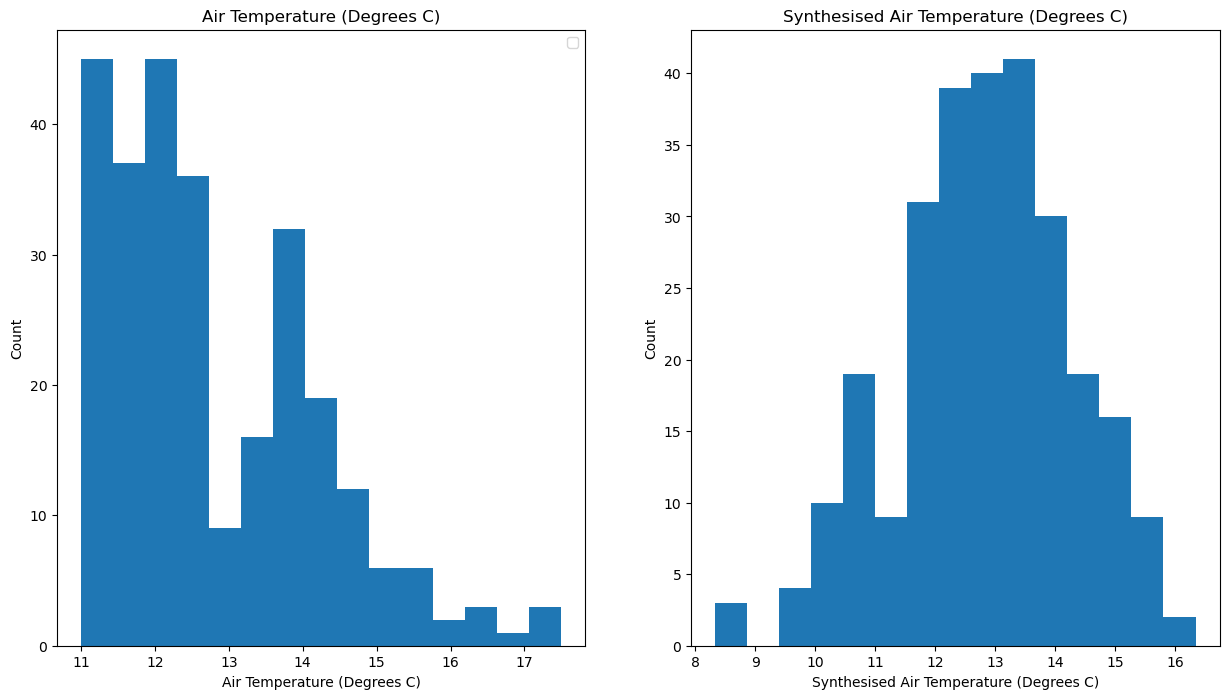

In [276]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(df2["Air Temperature (Degrees C)"], bins =15)
plt.xlabel("Air Temperature (Degrees C)")
plt.ylabel("Count")
plt.legend()
plt.title("Air Temperature (Degrees C)")
plt.subplot(1,2,2)
plt.hist(ts01["Synthesised Air Temperature (Degrees C)"], bins =15)
plt.xlabel("Synthesised Air Temperature (Degrees C)")
plt.ylabel("Count")
plt.title("Synthesised Air Temperature (Degrees C)")
plt.show()

Code block used to determine mode of variable
import statistics
data = np.loadtxt('data.csv')

mode = statistics.mode(data)

print("The mode of the dataset is:", mode)

In [277]:
#random triangular https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html
left = 1012.8
mode = 1014.8
right = 1017.1
rng=np.random.default_rng()

d31 = pd.DataFrame(data = np.random.triangular(11, 12.5, 17.5,100), columns = ["Synthesised Air Temperature (Degrees C)"])


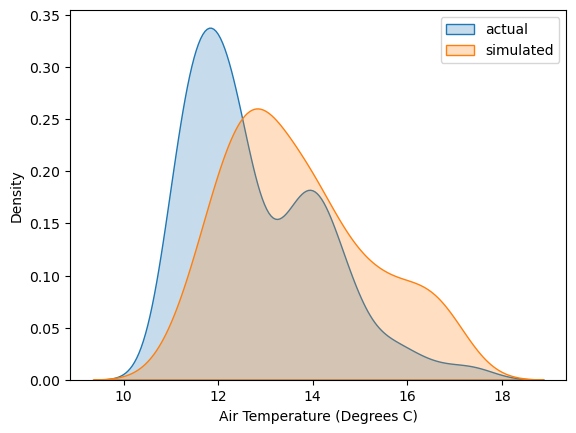

In [278]:
sns.kdeplot(df2['Air Temperature (Degrees C)'],shade=True, label="actual")
sns.kdeplot(d31['Synthesised Air Temperature (Degrees C)'],shade=True, label="simulated")
plt.legend()

I used following code to identify suitable distributions for my data. After testing these, I did not find a more suitable distribution.
#code to check distributions
from scipy import stats
from fitter import Fitter
data = pd.read_csv('data.csv')
f = Fitter(data)
f.fit()
f.summary()


some ditsributions I tested to to get a better distribution match.
1. standard cauchy
2. standard gamma
3. standard triangle
4. uniform
5. johnsonsu

# Conclusion

End